In [190]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statistics import mode

In [191]:
train_data=pd.read_csv(r"Downloads\train1.csv")
test_data=pd.read_csv(r"Downloads\test1.csv")
train_data.shape,test_data.shape

((164309, 14), (109541, 13))

### Dealing with train_data

In [192]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [193]:
train_data.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [194]:
mode=train_data["Length_Employed"].mode()[0]
mode
train_data["Length_Employed"].fillna(mode,inplace=True)

In [195]:
mode=train_data["Home_Owner"].mode()[0]
train_data["Home_Owner"].fillna(mode,inplace=True)
train_data["Home_Owner"].isnull().sum()

train_data["Home_Owner"].replace({"None":"Other"},inplace=True)
train_data["Home_Owner"].value_counts()

Mortgage    95694
Rent        56031
Own         12525
Other          59
Name: Home_Owner, dtype: int64

In [196]:
mean=train_data["Annual_Income"].mean()
train_data["Annual_Income"].fillna(mean,inplace=True)

In [197]:
mean=train_data["Months_Since_Deliquency"].mean()
train_data["Months_Since_Deliquency"].fillna(mean,inplace=True)

In [198]:
train_data.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [199]:
object=["Length_Employed","Home_Owner","Income_Verified","Purpose_Of_Loan","Gender"]
for i in object:
    print("for object in "+i)
    print(train_data[i].value_counts())
    print("###################################")

for object in Length_Employed
10+ years    60286
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64
###################################
for object in Home_Owner
Mortgage    95694
Rent        56031
Own         12525
Other          59
Name: Home_Owner, dtype: int64
###################################
for object in Income_Verified
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64
###################################
for object in Purpose_Of_Loan
debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding    

In [200]:
train_data["Income_Verified"].replace({"VERIFIED - income":"verified","VERIFIED - income source":"verified"},inplace=True)
train_data["Income_Verified"].value_counts()

verified        112436
not verified     51873
Name: Income_Verified, dtype: int64

In [201]:
train_data.describe(include="all")

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
count,1.643090e+05,164309,164309,164309,1.643090e+05,164309,164309,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309,164309.000000
unique,NaN,1290,11,4,NaN,2,14,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,"10,000",10+ years,Mortgage,NaN,verified,debt_consolidation,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,11622,60286,95694,NaN,112436,97101,NaN,NaN,NaN,NaN,NaN,117176,NaN
mean,1.008216e+07,NaN,NaN,NaN,7.333116e+04,NaN,NaN,17.207189,0.781698,34.229356,11.193818,25.067665,NaN,2.158951
std,4.743207e+04,NaN,NaN,NaN,5.557439e+04,NaN,NaN,7.845083,1.034747,14.793023,4.991813,11.583067,NaN,0.738364
min,1.000000e+07,NaN,NaN,NaN,4.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,1.000000
25%,1.004108e+07,NaN,NaN,NaN,4.860000e+04,NaN,NaN,11.370000,0.000000,34.000000,8.000000,17.000000,NaN,2.000000
50%,1.008216e+07,NaN,NaN,NaN,7.000000e+04,NaN,NaN,16.840000,0.000000,34.229356,10.000000,23.000000,NaN,2.000000
75%,1.012323e+07,NaN,NaN,NaN,8.200000e+04,NaN,NaN,22.780000,1.000000,34.229356,14.000000,32.000000,NaN,3.000000


In [202]:
for i in range(len(train_data)):
    token=train_data["Loan_Amount_Requested"][i].split(",")
    number=""
    number=number.join(token)
    train_data["Loan_Amount_Requested"][i]=number



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [203]:
train_data=train_data.astype({"Loan_Amount_Requested":"int"})

### Dealing with test_data

In [204]:
test_data.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [205]:
mode=test_data["Length_Employed"].mode()[0]
mode
test_data["Length_Employed"].fillna(mode,inplace=True)

In [206]:
mode=test_data["Home_Owner"].mode()[0]
test_data["Home_Owner"].fillna(mode,inplace=True)
test_data["Home_Owner"].isnull().sum()


0

In [207]:
test_data["Home_Owner"].replace({"None":"Other"},inplace=True)
test_data["Home_Owner"].value_counts()

Mortgage    63636
Rent        37511
Own          8354
Other          40
Name: Home_Owner, dtype: int64

In [208]:
mean=test_data["Annual_Income"].mean()
test_data["Annual_Income"].fillna(mean,inplace=True)

In [209]:
mean=test_data["Months_Since_Deliquency"].mean()
test_data["Months_Since_Deliquency"].fillna(mean,inplace=True)

In [210]:
test_data.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
dtype: object

In [211]:
object=["Length_Employed","Home_Owner","Income_Verified","Purpose_Of_Loan","Gender"]
for i in object:
    print("for object in "+i)
    print(test_data[i].value_counts())
    print("###################################")

for object in Length_Employed
10+ years    40349
2 years       9800
3 years       8504
< 1 year      8328
5 years       7228
1 year        6914
4 years       6609
6 years       6257
7 years       6136
8 years       5198
9 years       4218
Name: Length_Employed, dtype: int64
###################################
for object in Home_Owner
Mortgage    63636
Rent        37511
Own          8354
Other          40
Name: Home_Owner, dtype: int64
###################################
for object in Income_Verified
VERIFIED - income           39655
VERIFIED - income source    35238
not verified                34648
Name: Income_Verified, dtype: int64
###################################
for object in Purpose_Of_Loan
debt_consolidation    64302
credit_card           24710
home_improvement       6186
other                  5500
major_purchase         2277
small_business         1672
car                    1264
medical                1092
moving                  701
vacation                616
house      

In [212]:
test_data["Income_Verified"].replace({"VERIFIED - income":"verified","VERIFIED - income source":"verified"},inplace=True)
test_data["Income_Verified"].value_counts()

verified        74893
not verified    34648
Name: Income_Verified, dtype: int64

In [213]:
for i in range(len(test_data)):
    token=test_data["Loan_Amount_Requested"][i].split(",")
    number=""
    number=number.join(token)
    test_data["Loan_Amount_Requested"][i]=number


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [214]:
test_data=test_data.astype({"Loan_Amount_Requested":"int"})

In [215]:
test_data.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

### Analysis of train_data

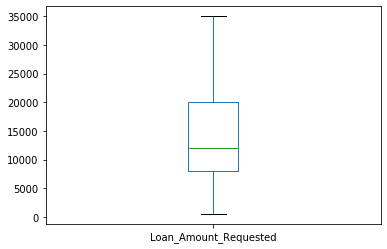

In [216]:
train_data["Loan_Amount_Requested"].plot(kind="box")

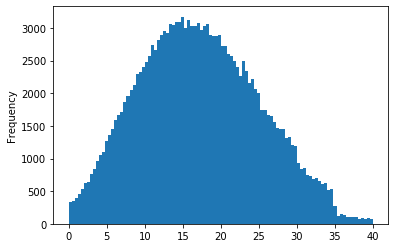

In [217]:
train_data["Debt_To_Income"].plot(kind="hist",bins=100)

In [218]:
train_data.drop(train_data[train_data["Debt_To_Income"]>35].index,inplace=True)

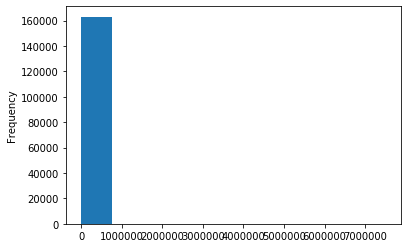

In [219]:
train_data["Annual_Income"].plot(kind="hist")

In [220]:
train_data[train_data["Annual_Income"]<50000].shape

(41675, 14)

In [221]:
bin=[0,100000,500000,10000000]
label=["less than 100k","100k-500k","500k-1000k"]
train_data["Annual_Income"]=pd.cut(train_data["Annual_Income"],bins=bin,labels=label)

In [222]:
train_data["Annual_Income"]

0         less than 100k
1         less than 100k
2         less than 100k
3         less than 100k
4         less than 100k
               ...      
164304    less than 100k
164305    less than 100k
164306    less than 100k
164307    less than 100k
164308    less than 100k
Name: Annual_Income, Length: 163032, dtype: category
Categories (3, object): [less than 100k < 100k-500k < 500k-1000k]

In [223]:
train_data=train_data.astype({"Inquiries_Last_6Mo":"str","Months_Since_Deliquency":"str","Number_Open_Accounts":"str","Number_Open_Accounts":"str"})

In [232]:
train_data["Annual_Income"].dtypes

CategoricalDtype(categories=['less than 100k', '100k-500k', '500k-1000k'], ordered=True)

In [233]:
train_data.drop(train_data[train_data["Annual_Income"]=="500k-1000k"].index,inplace=True)

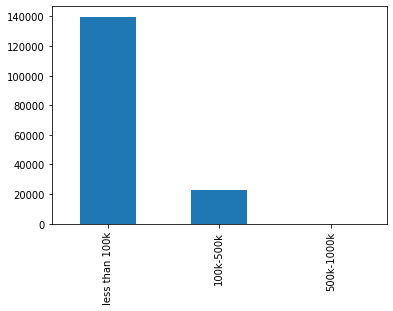

In [234]:
train_data["Annual_Income"].value_counts().plot(kind="bar")

In [231]:
train_data["Annual_Income"].value_counts()

less than 100k    139876
100k-500k          23026
500k-1000k             0
Name: Annual_Income, dtype: int64

In [235]:
train_data.dtypes

Loan_ID                       int64
Loan_Amount_Requested         int32
Length_Employed              object
Home_Owner                   object
Annual_Income              category
Income_Verified              object
Purpose_Of_Loan              object
Debt_To_Income              float64
Inquiries_Last_6Mo           object
Months_Since_Deliquency      object
Number_Open_Accounts         object
Total_Accounts                int64
Gender                       object
Interest_Rate                 int64
dtype: object

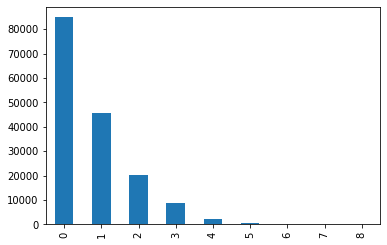

In [236]:
train_data["Inquiries_Last_6Mo"].value_counts().plot(kind="bar")

In [242]:
train_data["Number_Open_Accounts"].value_counts()

9     15671
10    14807
8     14585
11    13605
7     13226
12    12197
6     10788
13    10244
14     8521
5      7566
15     7064
16     5869
17     4610
4      4418
18     3796
19     3023
20     2329
3      1890
21     1798
22     1421
23     1118
24      884
25      665
2       644
26      496
27      373
28      282
29      215
30      163
31      131
32       89
33       76
34       61
36       49
35       47
37       33
1        31
38       23
39       22
42       12
40       12
41       10
43        7
58        4
44        3
50        3
45        3
47        3
49        3
53        2
0         2
48        2
46        1
76        1
62        1
52        1
54        1
51        1
Name: Number_Open_Accounts, dtype: int64

In [243]:
train_data["Total_Accounts"].value_counts()

21     6088
22     6050
20     5946
18     5940
19     5906
       ... 
156       1
97        1
92        1
105       1
116       1
Name: Total_Accounts, Length: 100, dtype: int64